In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# === Load Data ===
df = pd.read_csv(r'D:\Coding\Major-Project\new_\data\PEMfuel cell.csv')

df.head()

,I,V,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode
0,0.0,491.114619,0.0,8.580000e-35,20.0,8.410000e-38,0.000000e+00,0.000000e+00,0.5
1,0.0,491.114619,0.0,-3.880000e-12,20.0,4.970000e-07,4.110000e-09,2.680000e-14,0.5
2,0.0,491.114619,0.0,-7.750000e-12,20.0,1.140000e-06,1.130000e-08,8.050000e-14,0.5
3,0.0,491.114619,0.0,-3.050000e-11,20.0,5.330000e-06,8.890000e-08,1.350000e-12,0.5
4,0.0,491.114619,0.0,-6.400000e-11,20.0,1.160000e-05,2.240000e-07,5.360000e-12,0.5


In [40]:
X = df[['I', 'T', 'Hydrogen', 'Oxygen']]  # I = current, T = temperature
y = df['V']  # Voltage

In [41]:
# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# === SVR Pipeline ===
model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
)

In [43]:
# === Train ===
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=100))])

In [44]:
# === Predictions ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [45]:
# === Evaluation ===
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

Train R²: 0.9920
Test R²:  0.9897
Train MAE: 3.3160
Test MAE: 3.6356


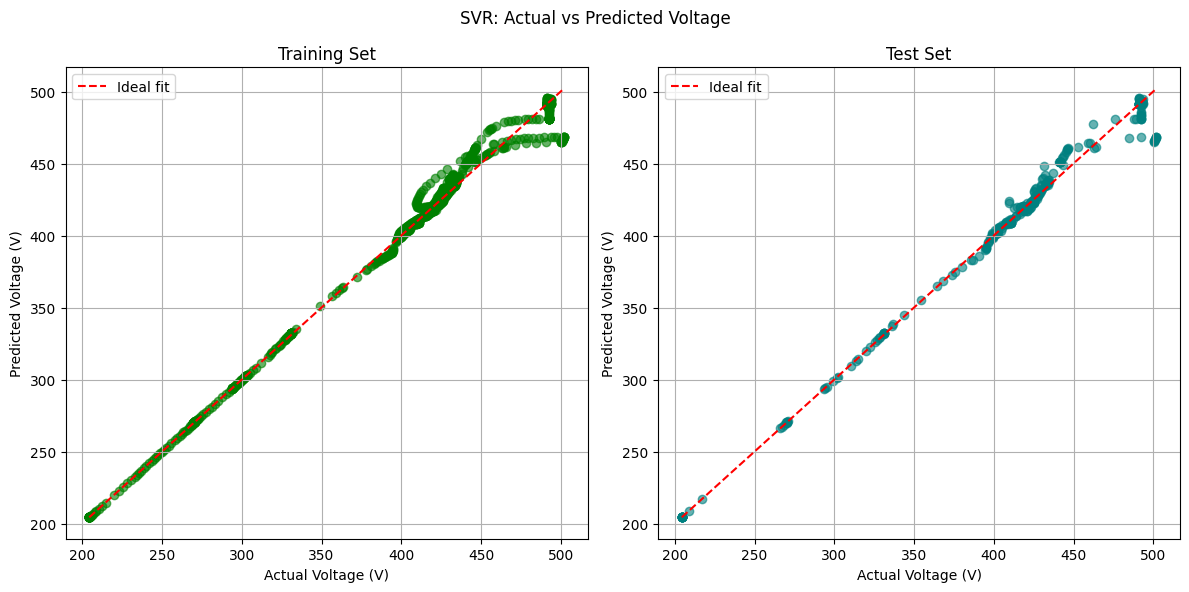

In [46]:
# === Plot: Actual vs Predicted (Train & Test) ===
plt.figure(figsize=(12, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.title("Training Set")
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.grid(True)
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.title("Test Set")
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.grid(True)
plt.legend()

plt.suptitle("SVR: Actual vs Predicted Voltage")
plt.tight_layout()
plt.show()